In [2]:
##imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('../results.csv')
df.shape

(45773, 19)

In [4]:
#features and target selection
features = ['date','starting_ct', 'rank_1', 'rank_2']
target = ['map_winner']
X = df[features]
y = df[target]

In [6]:
#label encoder
#to go back: le.insverse_transform()
le = preprocessing.LabelEncoder()

X.loc[:, 'date'] = le.fit_transform(X['date'])
X.head()

/home/sergio/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,date,starting_ct,rank_1,rank_2
0,1541,2,62,63
1,1541,2,62,63
2,1541,1,140,118
3,1541,2,61,38
4,1541,2,61,38


In [7]:
scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)

In [8]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [9]:
print(X_scaled.shape)
print(X_pca.shape)

(45773, 4)
(45773, 2)


Text(0, 0.5, 'Second principal component')

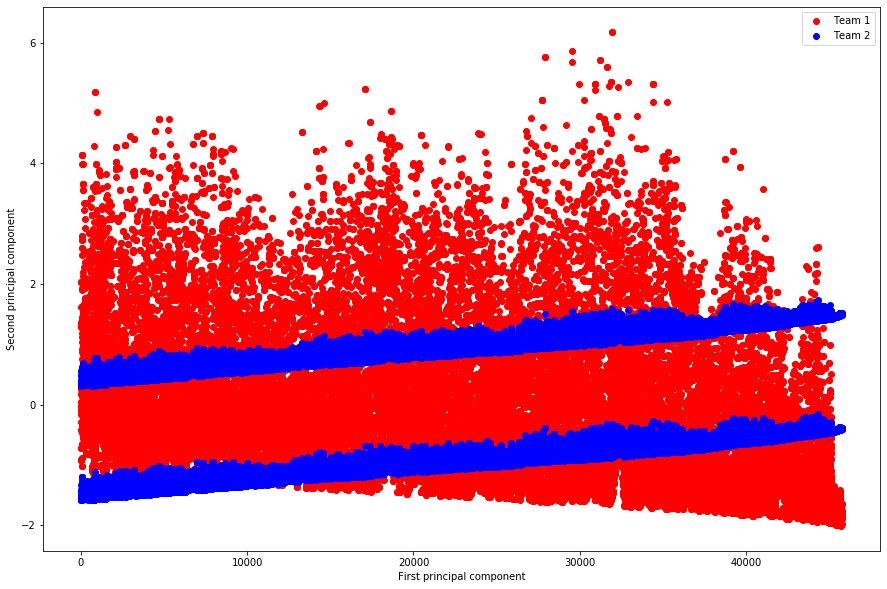

In [10]:
plt.figure(figsize=(15,10))
plt.plot(X_pca[:,0],'ro', color='red')
plt.plot(X_pca[:,1],'ro',color='blue')
plt.legend(['Team 1', 'Team 2'], loc="best")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Principal components')

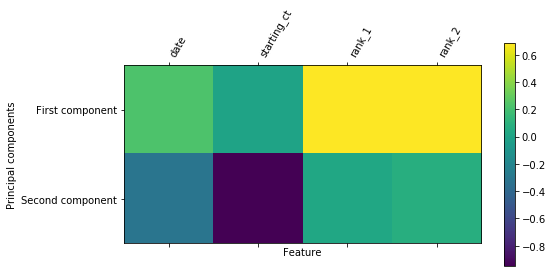

In [11]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(features)),
features, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [12]:
X_pca

array([[ 0.17865487, -1.50642427],
       [ 0.17865487, -1.50642427],
       [ 1.62337392,  0.48439865],
       ...,
       [-1.79383413,  1.50361468],
       [-1.86043765, -0.39329491],
       [-1.97572841, -0.40632678]])